## Testing creation of fiber bundles and observing strategies

Make logo foreground/background.

(-0.5, 511.5, -0.5, 511.5)

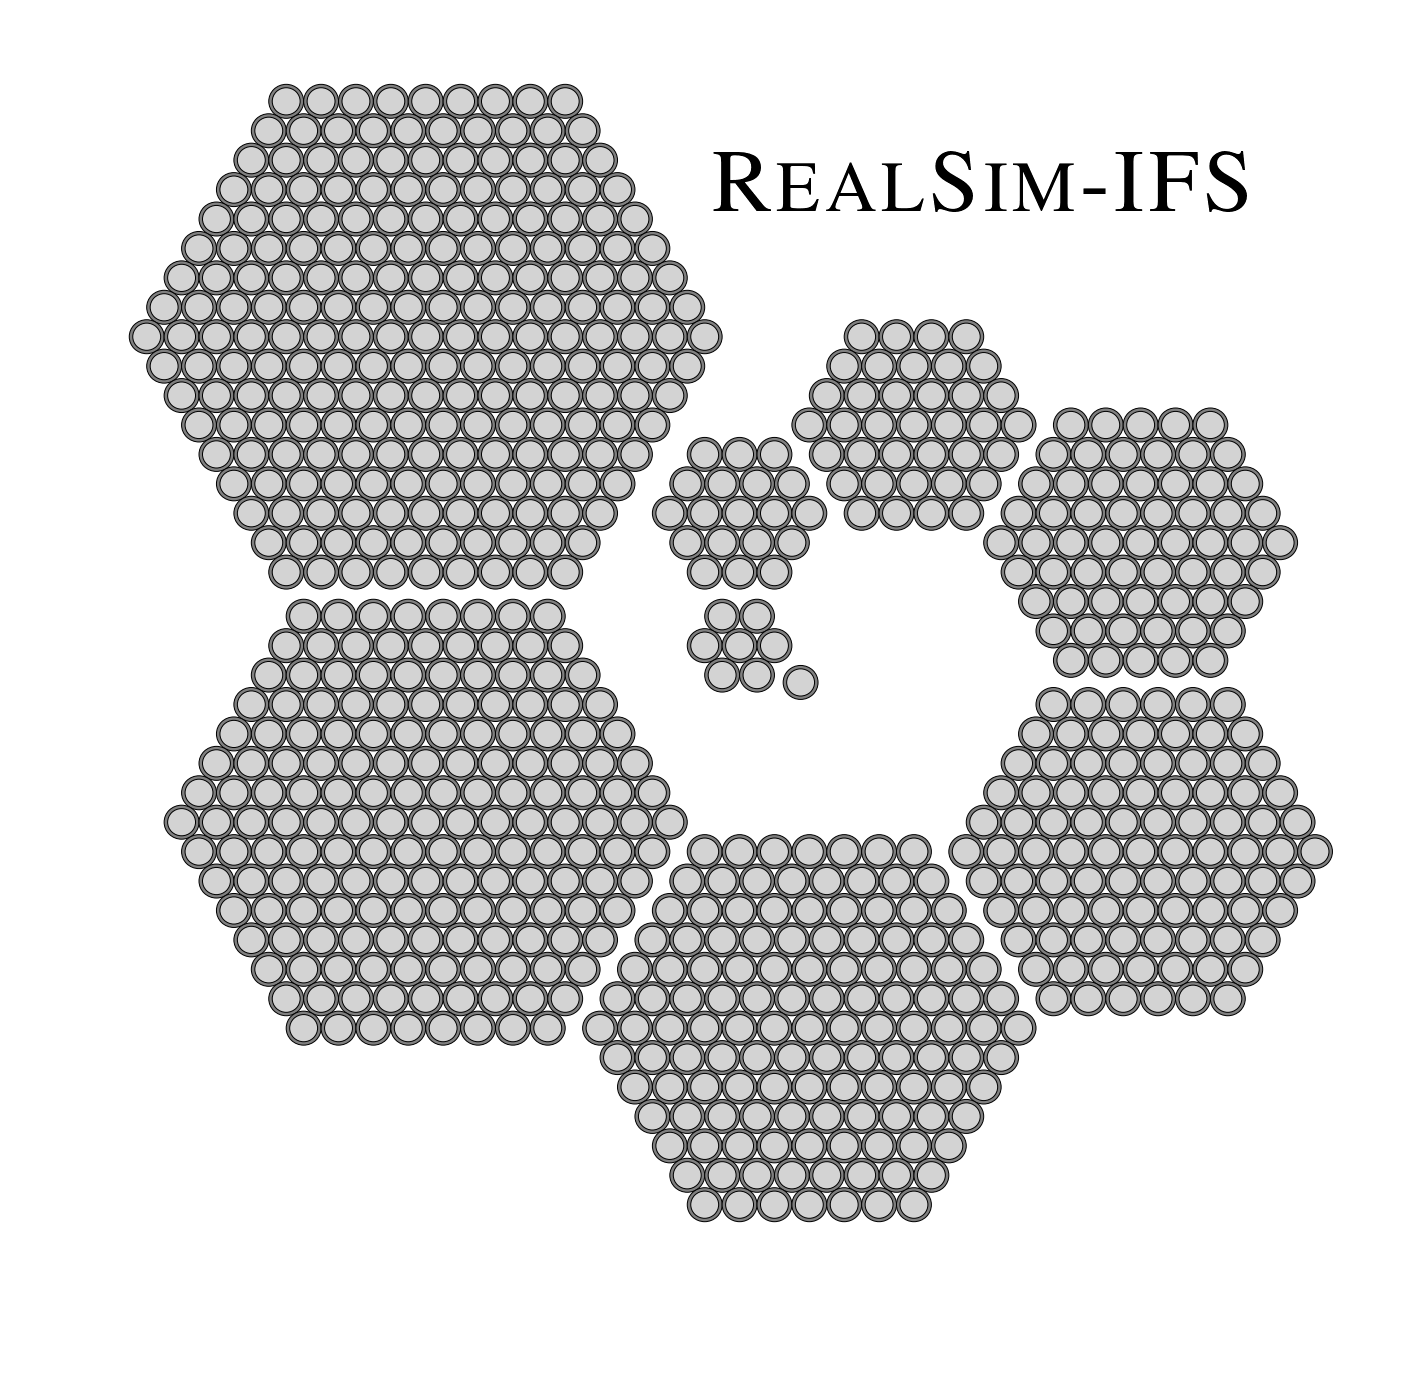

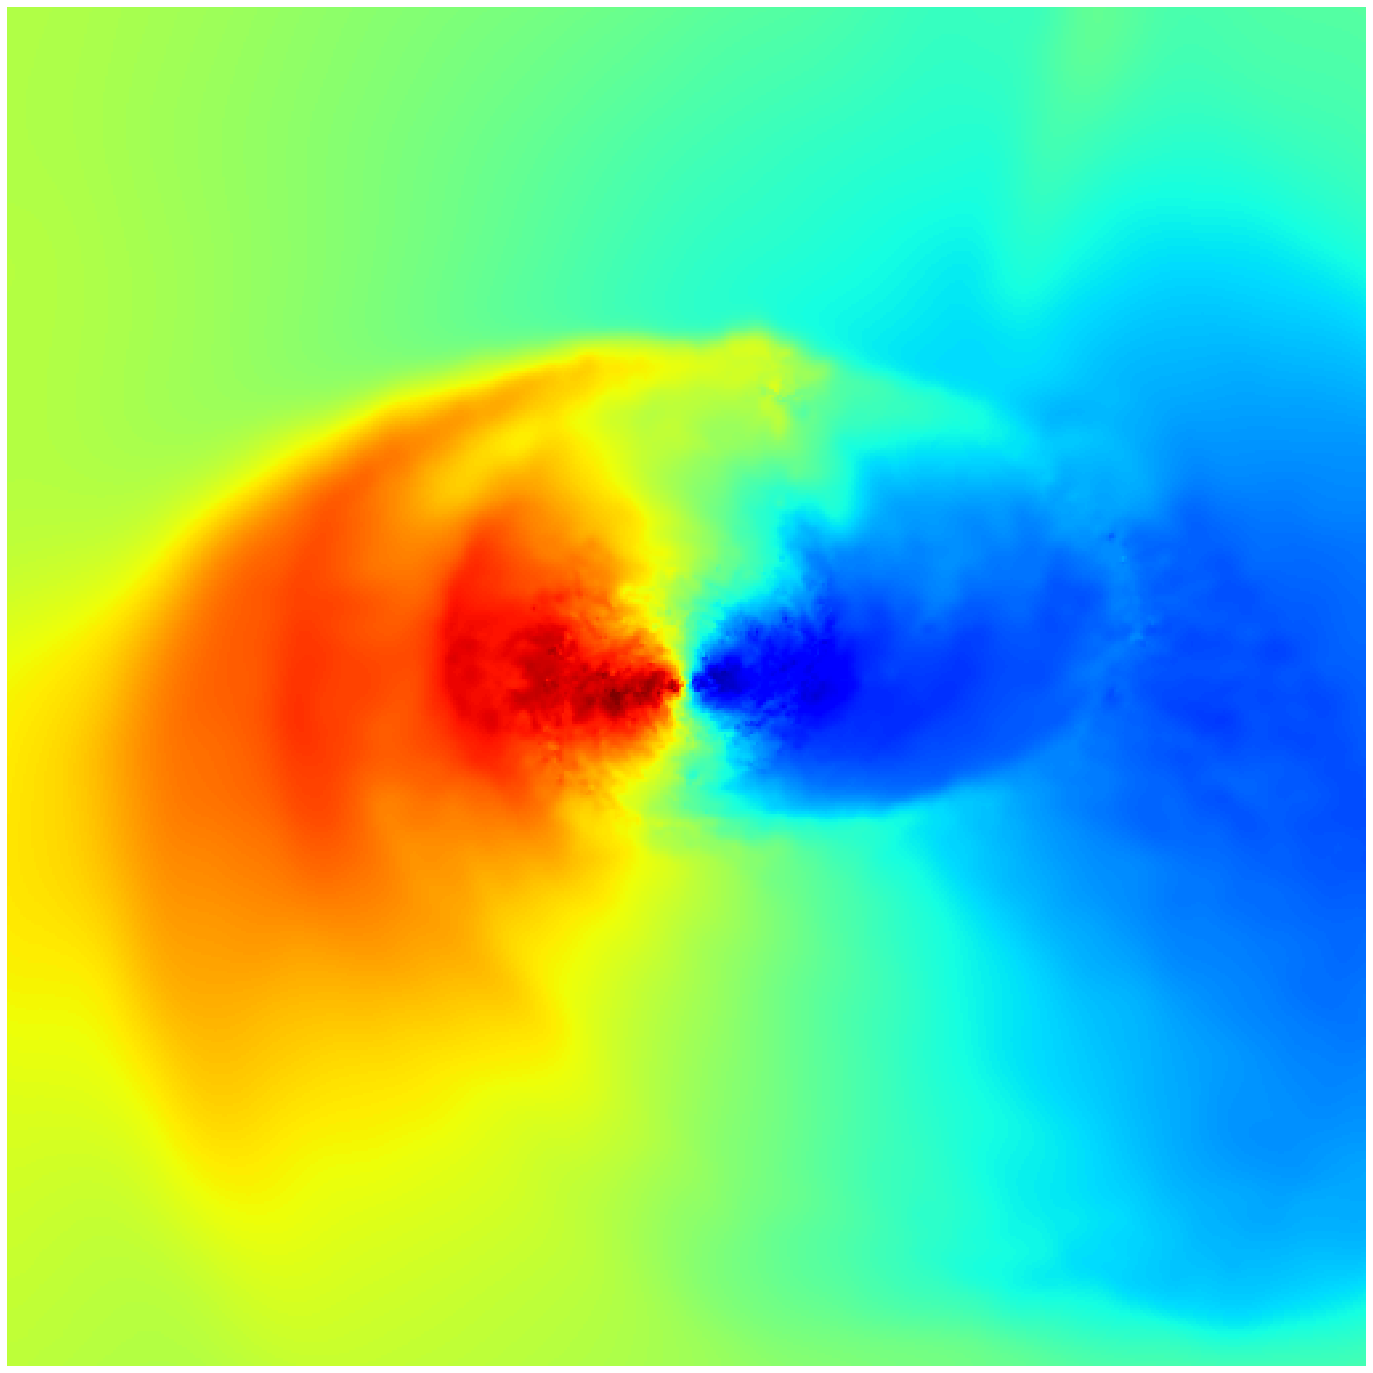

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from copy import copy
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

def Generate_MaNGA_Bundle(bundle_name='None',
                          fibers_per_side=4,
                          fiber_diameter_mm=150,
                          core_diameter_mm=120,
                          arcsec_per_mm=2./120,
                          rotation_degrees=0.,
                          bundle_xoffset_arcsec=0.,
                          bundle_yoffset_arcsec=0.,
                          return_params=True):
    '''Generate arrays `xc_arr` and `yc_arr` for the coordinates 
    of the fibers in a hexabundle defined by `fibers_per_side` or
    a specific MaNGA hexabundle name from the list of valid names.
    To define a hexabundle with a specifc number of fibers per 
    edge, set `bundle_name` to `None` and `fibers_per_side` to 
    an integer. Other necessary parameters are the fiber and core 
    diameters (in mm) and the conversion of mm to arcsec in the 
    focal plane. For MaNGA, this is 2 arcsec per full core 
    diameter. The pattern can be rotated by an angle
    `rotation_degrees` (degrees) about the origin (x=0,y=0) and 
    also shifted with bundle_xoffset_arcsec and 
    bundle_yoffset_arcsec (arcsec).'''
    
    fiber_diameter_arcsec = fiber_diameter_mm*arcsec_per_mm # arcsec
    core_diameter_arcsec = core_diameter_mm*arcsec_per_mm # arcsec
    cladding_arcsec = (core_diameter_mm-fiber_diameter_mm)*arcsec_per_mm # arcsec
    valid_bundle_names = ['N7','N19','N37','N61','N91','N127']

    if bundle_name is 'None':
        fibers_per_side = fibers_per_side

    elif bundle_name in valid_bundle_names:
        if bundle_name == 'N7':
            fibers_per_side = 2
        if bundle_name == 'N19':
            fibers_per_side = 3
        if bundle_name == 'N37':
            fibers_per_side = 4
        if bundle_name == 'N61':
            fibers_per_side = 5
        if bundle_name == 'N91':
            fibers_per_side = 6
        if bundle_name == 'N127':
            fibers_per_side = 7
    else:
        print("You have not selected a valid MaNGA fiber bundle name.")
        print("Choose from the following options:")
        print([str(name) for name in valid_bundle_names])
        print('OR set the `fibers_per_side` keyword to the integer number of fibers along each edge of the desired hexagonal bundle.')

    fiber_rows_per_bundle = 2*fibers_per_side-1
    xc_arr = np.array([])
    yc_arr = np.array([])
    fiber_xoffset = 0.

    for fiber_row_index in range(fiber_rows_per_bundle):
        if fiber_row_index == 0:
            fibers_in_row = copy(fibers_per_side)
        elif fiber_row_index>=fibers_per_side:
            fibers_in_row-=1
            fiber_xoffset-=fiber_diameter_arcsec/2.
        else:
            fibers_in_row+=1
            fiber_xoffset+=fiber_diameter_arcsec/2.
        xc_new = np.arange(0,fibers_in_row)*fiber_diameter_arcsec-fiber_xoffset
        yc_new = np.zeros_like(xc_new)-fiber_row_index*np.sqrt(3)/2*fiber_diameter_arcsec
        xc_arr = np.concatenate((xc_arr,xc_new))
        yc_arr = np.concatenate((yc_arr,yc_new))

    index_center = int(len(xc_arr)/2)
    xc = xc_arr[index_center]
    yc = yc_arr[index_center]
    xc_arr -= xc
    yc_arr -= yc
    
    params = {'bundle_name':bundle_name,
              'fibers_per_side':fibers_per_side,
              'fiber_diameter_mm':fiber_diameter_mm,
              'core_diameter_mm':core_diameter_mm,
              'arcsec_per_mm':arcsec_per_mm,
              'rotation_degrees':rotation_degrees,
              'bundle_xoffset_arcsec':bundle_xoffset_arcsec,
              'bundle_yoffset_arcsec':bundle_yoffset_arcsec,
              'fiber_diameter_arcsec':fiber_diameter_arcsec,
              'core_diameter_arcsec':core_diameter_arcsec,
              'cladding_arcsec':cladding_arcsec,
              'fibers_in_bundle':len(xc_arr)}
    
    if return_params:
        return (xc_arr,yc_arr),params
    else: 
        return (xc_arr,yc_arr)

fig,ax = plt.subplots(figsize=(25,25))
ax.set_xlim(-30,70)
ax.set_ylim(-40,60)

core_colour = 'lightgrey'
clad_colour = 'grey'

(xc_arr,yc_arr),params = Generate_MaNGA_Bundle(bundle_name='None',fibers_per_side=9,return_params=True)
fiber_diameter_arcsec = params['fiber_diameter_arcsec']
core_diameter_arcsec = params['core_diameter_arcsec']
for xy in zip(xc_arr,yc_arr+fiber_diameter_arcsec*np.sqrt(3)/2*16.5):
    clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=clad_colour)
    ax.add_artist(clad)
    core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=core_colour)
    ax.add_artist(core)

(xc_arr,yc_arr),params = Generate_MaNGA_Bundle(bundle_name='None',fibers_per_side=8,return_params=True)
fiber_diameter_arcsec = params['fiber_diameter_arcsec']
core_diameter_arcsec = params['core_diameter_arcsec']
for xy in zip(xc_arr,yc_arr):
    clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=clad_colour)
    ax.add_artist(clad)
    core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=core_colour)
    ax.add_artist(core)
    
(xc_arr,yc_arr),params = Generate_MaNGA_Bundle(bundle_name='None',fibers_per_side=7,return_params=True)
fiber_diameter_arcsec = params['fiber_diameter_arcsec']
core_diameter_arcsec = params['core_diameter_arcsec']
for xy in zip(xc_arr+fiber_diameter_arcsec*(11),yc_arr-fiber_diameter_arcsec*np.sqrt(3)/2*7):
    clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=clad_colour)
    ax.add_artist(clad)
    core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=core_colour)
    ax.add_artist(core)
    
(xc_arr,yc_arr),params = Generate_MaNGA_Bundle(bundle_name='None',fibers_per_side=6,return_params=True)
fiber_diameter_arcsec = params['fiber_diameter_arcsec']
core_diameter_arcsec = params['core_diameter_arcsec']
for xy in zip(xc_arr+fiber_diameter_arcsec*(20.5),yc_arr+fiber_diameter_arcsec*np.sqrt(3)/2*(-1)):
    clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=clad_colour)
    ax.add_artist(clad)
    core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=core_colour)
    ax.add_artist(core)
    
(xc_arr,yc_arr),params = Generate_MaNGA_Bundle(bundle_name='None',fibers_per_side=5,return_params=True)
fiber_diameter_arcsec = params['fiber_diameter_arcsec']
core_diameter_arcsec = params['core_diameter_arcsec']
for xy in zip(xc_arr+fiber_diameter_arcsec*(20.5),yc_arr+fiber_diameter_arcsec*np.sqrt(3)/2*(9.5)):
    clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=clad_colour)
    ax.add_artist(clad)
    core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=core_colour)
    ax.add_artist(core)
    
(xc_arr,yc_arr),params = Generate_MaNGA_Bundle(bundle_name='None',fibers_per_side=4,return_params=True)
fiber_diameter_arcsec = params['fiber_diameter_arcsec']
core_diameter_arcsec = params['core_diameter_arcsec']
for xy in zip(xc_arr+fiber_diameter_arcsec*(14),yc_arr+fiber_diameter_arcsec*np.sqrt(3)/2*(13.5)):
    clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=clad_colour)
    ax.add_artist(clad)
    core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=core_colour)
    ax.add_artist(core)
    
(xc_arr,yc_arr),params = Generate_MaNGA_Bundle(bundle_name='None',fibers_per_side=3,return_params=True)
fiber_diameter_arcsec = params['fiber_diameter_arcsec']
core_diameter_arcsec = params['core_diameter_arcsec']
for xy in zip(xc_arr+fiber_diameter_arcsec*(9.),yc_arr+fiber_diameter_arcsec*np.sqrt(3)/2*(10.5)):
    clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=clad_colour)
    ax.add_artist(clad)
    core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=core_colour)
    ax.add_artist(core)
    
(xc_arr,yc_arr),params = Generate_MaNGA_Bundle(bundle_name='None',fibers_per_side=2,return_params=True)
fiber_diameter_arcsec = params['fiber_diameter_arcsec']
core_diameter_arcsec = params['core_diameter_arcsec']

for xy in zip(xc_arr+fiber_diameter_arcsec*(9.),yc_arr+fiber_diameter_arcsec*np.sqrt(3)/2*(6)):
    clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=clad_colour)
    ax.add_artist(clad)
    core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=core_colour)
    ax.add_artist(core)
    
(xc_arr,yc_arr),params = Generate_MaNGA_Bundle(bundle_name='None',fibers_per_side=1,return_params=True)
fiber_diameter_arcsec = params['fiber_diameter_arcsec']
core_diameter_arcsec = params['core_diameter_arcsec']

for xy in zip(xc_arr+fiber_diameter_arcsec*(10.75),yc_arr+fiber_diameter_arcsec*np.sqrt(3)/2*(4.75)):
    clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=clad_colour,zorder=1)
    ax.add_artist(clad)
    core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor=core_colour,zorder=1)
    ax.add_artist(core)
    
ax.axis('off')

ax.text(0.7,0.85,r'\textsc{RealSim-IFS}',transform=ax.transAxes,fontsize=90,ha='center')
#fig.savefig('/Users/cbottrell/Project/RealSim-IFS/Frg.pdf',bbox_inches='tight')


#ax.text(0.7,0.825,r'Bottrell et al. in prep',transform=ax.transAxes,fontsize=32,ha='center')

fig,ax = plt.subplots(figsize=(25,25))

vmap = np.load('/Users/cbottrell/Project/RealSim-IFS/LOSVD/kinemetry_vmap_G2G3_e-orbit_1_0251_gas_i0.npy')
ax.imshow(vmap,cmap='jet',vmin=-150,vmax=150,origin='lower',interpolation='None')

ax.axis('off')

#fig.savefig('/Users/cbottrell/Project/RealSim-IFS/Bkg.pdf',bbox_inches='tight')
#fig.savefig('/Users/cbottrell/Project/RealSim-IFS/Frg_small.pdf',bbox_inches='tight')

In [3]:
import os,sys
import numpy as np
from copy import copy

def Err_n_observations():
    print('You must select `n_observations` that is either:')
    print('(1) `Classic` for exact MaNGA specs and 3-exposure pattern; OR')
    print('(2) An integer `n_observations` greater than zero.')
    sys.exit(0)
    
def Check_for_list(x,n_observations):
    if type(x) is np.ndarray:
        if len(x) == n_observations:
            return x
    elif type(x) is list:
        if len(x) == n_observations:
            return np.array(x)
    else:
        err_msg = ['When `n_observations` is set greater than 1 and not `Classic`, you must set up the pattern.\n',
                   'The following parameters must be all be lists or 1D numpy arrays of length `n_observations`:\n',
                   '   (1) `bundle_xoffset_arcsec`\n',
                   '   (2) `bundle_yoffset_arcsec`\n',
                   '   (3) `rotation_degrees`\n',
                   'You are seeing this error because one or more of these parameters are not in the correct format.\n']
        sys.exit(''.join(err_msg))

def Rotate(v,rotation_degrees):
    '''Rotate vectors `v` by `rotation_degrees in R2=>R2'''
    theta_rad = rotation_degrees*np.pi/180
    cos_theta, sin_theta = np.cos(theta_rad), np.sin(theta_rad)
    A_theta = np.array([[cos_theta, -sin_theta],
                        [sin_theta,  cos_theta]])
    v = np.matmul(A_theta,v)
    return v

def MaNGA_Observe(n_observations='Classic',
                  fibers_per_side=4,
                  bundle_name='None',
                  fiber_diameter_mm=0.150,
                  core_diameter_mm=0.120,
                  arcsec_per_mm=1./0.06048,
                  rotation_degrees=0.,
                  bundle_xoffset_arcsec=0.,
                  bundle_yoffset_arcsec=0.,
                  return_params=True):
    '''
    Creates a MaNGA-like IFS observing pattern. For an overview of the MaNGA observing strategy, see here: 
    https://www.sdss.org/dr14/manga/manga-survey-strategy/
    
    Or here for more rigorous descriptions:
    Law et al. (2015) https://ui.adsabs.harvard.edu/abs/2015AJ....150...19L/abstract
    Bundy et al. (2015) https://ui.adsabs.harvard.edu/abs/2015ApJ...798....7B/abstract
    
    RealSim_IFS is a public tool and you are free to use/modify it however you wish. If you use RealSim_IFS.MaNGA_Observe or an adaptation in your research, please cite the papers above which provided the technical specifications I used to create the module. I would also appreciate citation to [Bottrell et al. in prep] until the corresponding release paper is published.
    
    Keyword descriptions:
    
    * `n_observations` (int or string) is the integer number of exposures you wish to take with a given fibre bundle type. `n_observations` can also be set to `Classic` to restore all parameters to the default MaNGA instrumental specs and three-exposure offset pattern used to "dither" the data. In short, dithering is used to fill in the gaps between the fibre footprints of individual exposures. Dithering is also important because, for the MaNGA instrument, it enables adequate sampling of the typical atmospheric point-spread function (1.6 arcsec). You can alternatively experiment with your own exposure pattern and dithering strategy by setting `n_observations` to any positive integer. In the case of `n_observations` greater than 1, the `bundle_x(y)offset_arcsec` and `rotation_degrees` parameters must be lists or numpy arrays. See their descriptions for details.
    
    * `fibers_per_side` (int) is the number of fibres along each side of a MaNGA hexagonal fibre bundle. Only one `fibers_per_side` can be set for a given observation pattern (i.e. MaNGA_Observe does not allow combination of fibre bundles of different size in the same observing pattern). `fibers_per_side` must be a positive interger greater than 0. In the most limited scenario, a single fiber at (0,0) can be made by setting `n_observations` to 1 and `fibers_per_side` to 1. Setting `n_observations` to `Classic` and `fibers_per_side` to an integer greater than zero will produce the observing pattern with that particular fibre size and with the exact MaNGA core, fiber, and exposure specs.
    
    * `bundle_name` (string) supersedes `fibers_per_side`. Setting `bundle_name` to a valid MaNGA fibre bunde name (e.g. `N61`) will generate bundles with that specific fibre pattern and IGNORE the `fibers_per_side` parameter. By default, `bundle_name` is `None` and must be set to `None` to use the `fibers_per_side` keyword.
    
    * `fiber_diameter_mm` and `fiber_core_diameter` (floats) are the desired physical sizes of each individual fibre (core+cladding) and core in the bundle in [mm].
    
    * `arcsec_per_mm` (float) is the physical-to-angular conversion ratio [arcsec/mm] at the prime-focus of instrument. For MaNGA, the reciprocal angular-to-physial scale is 60.48 microns/arcsec.
    
    * `rotation_degrees` (float) sets the counter-clockwise rotation (in degrees) of an individual exposure or full observing pattern. If `n_observations` is `Classic` or 1, `rotation_degrees` must be a single float. `n_observations` is an integer greater than 1, then `rotation_degrees` must be a list or numpy array whose elements give the rotation of each individual exposure. For the same rotation of each exposure, set the `rotation_degrees` keyword to something like np.zeros(n_observations)+rotation_degrees. 
    
    * `bundle_xoffset_arcsec` and `bundle_yoffset_arcsec` (floats) are the offsets (in arcsec) of each exposure's centre from (0,0) in x and y. If `n_observations` is `Classic` they are the default MaNGA offsets for the 3-exposure observing strategy. If `n_observations` is 1, then they must each be floats. If `n_observations` is greater than 1, both must be lists or numpy arrays in the same way as for `rotation_degrees`.
    
    * `return_params` (boolean): returns many of the variables which were used to set the observing strategy as well as some intuitively-named parameters that are computed internally when generating the output.
    
    Output:
    
    (xc_arr,yc_arr) or (xc_arr,yc_arr,params)
    
    * `xc_arr` and `yc_arr` are the coordinates of all fibers in the `n_observations` of exposures used in the observing strategy. They each have shape (`fibers_per_bundle`, `n_observations`) where `fibers_per_bundle` is the total number of fibers in an individual bundle and is an output passed to `params`. 
    
    * `params` is the dictionary of variables that is returned if `return_params` is True.
    '''  
       
    if n_observations == 'Classic':
        # restore all params to MaNGA defaults
        fiber_diameter_mm=0.150
        core_diameter_mm=0.120
        arcsec_per_mm=1./0.06048
        bundle_xoffset_arcsec=0.
        bundle_yoffset_arcsec=0.
        if type(rotation_degrees) is not float:
            sys.exit('When `n_observations` is `Classic`, the `rotation_degrees` must be a single float.')
        
    elif isinstance(n_observations,str):
        Error_n_observations()
        
    elif isinstance(n_observations,int) and not n_observations>0:
        Error_n_observations()
        
    elif isinstance(n_observations,int) and n_observations>1:
        rotation_degrees = Check_for_list(rotation_degrees,n_observations)
        bundle_xoffset_arcsec = Check_for_list(bundle_xoffset_arcsec,n_observations)
        bundle_yoffset_arcsec = Check_for_list(bundle_yoffset_arcsec,n_observations)
            

    # Useful quantities. See also:
    # https://www.sdss.org/dr14/manga/manga-survey-strategy/ and Law et al. (2015)
    fiber_diameter_arcsec = fiber_diameter_mm*arcsec_per_mm # arcsec
    core_diameter_arcsec = core_diameter_mm*arcsec_per_mm # arcsec
    cladding_arcsec = (core_diameter_mm-fiber_diameter_mm)*arcsec_per_mm # arcsec
    exposure_offset_arcsec = fiber_diameter_arcsec/np.sqrt(3) # arscec
    valid_bundle_names = ['N7','N19','N37','N61','N91','N127']

    if bundle_name is 'None':
        fibers_per_side = fibers_per_side

    elif bundle_name in valid_bundle_names:
        if bundle_name == 'N7':
            fibers_per_side = 2
        if bundle_name == 'N19':
            fibers_per_side = 3
        if bundle_name == 'N37':
            fibers_per_side = 4
        if bundle_name == 'N61':
            fibers_per_side = 5
        if bundle_name == 'N91':
            fibers_per_side = 6
        if bundle_name == 'N127':
            fibers_per_side = 7
    else:
        print("You have not selected a valid MaNGA fiber bundle name.")
        print("Choose from the following options:")
        print([str(name) for name in valid_bundle_names])
        print('OR set the `fibers_per_side` keyword to the integer number of fibers along each edge of the desired hexagonal bundle.')

    fiber_rows_per_bundle = 2*fibers_per_side-1
    xc_arr = np.array([])
    yc_arr = np.array([])
    fiber_xoffset = 0.

    for fiber_row_index in range(fiber_rows_per_bundle):
        if fiber_row_index == 0:
            fibers_in_row = copy(fibers_per_side)
        elif fiber_row_index>=fibers_per_side:
            fibers_in_row-=1
            fiber_xoffset-=fiber_diameter_arcsec/2.
        else:
            fibers_in_row+=1
            fiber_xoffset+=fiber_diameter_arcsec/2.
        xc_new = np.arange(0,fibers_in_row)*fiber_diameter_arcsec-fiber_xoffset
        yc_new = np.zeros_like(xc_new)-fiber_row_index*np.sqrt(3)/2*fiber_diameter_arcsec
        xc_arr = np.concatenate((xc_arr,xc_new))
        yc_arr = np.concatenate((yc_arr,yc_new))

    index_center = int(len(xc_arr)/2)
    xc = xc_arr[index_center]
    yc = yc_arr[index_center]
    xc_arr -= xc
    yc_arr -= yc
    
    if n_observations == 'Classic':
        n_observations = 3
        bundle_xoffset_arcsec = np.array([0,-np.sqrt(3)/2,0])*exposure_offset_arcsec
        bundle_yoffset_arcsec = np.array([0,0.5,1])*exposure_offset_arcsec
        xc_arr = xc_arr[...,np.newaxis]+bundle_xoffset_arcsec
        yc_arr = yc_arr[...,np.newaxis]+bundle_yoffset_arcsec
        if not rotation_degrees == 0.:
            v = np.stack((xc_arr,yc_arr),axis=0)
            v_prime = np.empty_like(v)
            for i_obs in range(n_observations):
                v_prime[...,i_obs] = Rotate(v[...,i_obs],rotation_degrees)
            xc_arr = v_prime[0,:]
            yc_arr = v_prime[1,:]
    else:
        xc_arr = xc_arr[...,np.newaxis]+np.zeros(n_observations)
        yc_arr = yc_arr[...,np.newaxis]+np.zeros(n_observations)
        v = np.stack((xc_arr,yc_arr),axis=0)
        v_prime = np.empty_like(v)
        if n_observations == 1:
            v_prime[...,0] = Rotate(v[...,0],rotation_degrees)
        else:    
            for i_obs in range(n_observations):
                v_prime[...,i_obs] = Rotate(v[...,i_obs],rotation_degrees[i_obs])
        xc_arr = v_prime[0,:]+bundle_xoffset_arcsec
        yc_arr = v_prime[1,:]+bundle_yoffset_arcsec
    
    if return_params:
        params = {'bundle_name':bundle_name,
                  'fibers_per_side':fibers_per_side,
                  'n_observations':n_observations,
                  'fiber_diameter_mm':fiber_diameter_mm,
                  'core_diameter_mm':core_diameter_mm,
                  'arcsec_per_mm':arcsec_per_mm,
                  'rotation_degrees':rotation_degrees,
                  'bundle_xoffset_arcsec':bundle_xoffset_arcsec,
                  'bundle_yoffset_arcsec':bundle_yoffset_arcsec,
                  'fiber_diameter_arcsec':fiber_diameter_arcsec,
                  'core_diameter_arcsec':core_diameter_arcsec,
                  'cladding_arcsec':cladding_arcsec,
                  'fibers_in_bundle':len(xc_arr)}
        return (xc_arr,yc_arr),params
    else: 
        return (xc_arr,yc_arr)


if __name__ == '__main__':

    (xc_arr,yc_arr),params = MaNGA_Observe(bundle_name='None',fibers_per_side=4,n_observations=1,
                                           bundle_xoffset_arcsec=0.,
                                           bundle_yoffset_arcsec=0.,
                                           rotation_degrees = 45.,
                                           return_params=True)
    fiber_diameter_arcsec = params['fiber_diameter_arcsec']
    core_diameter_arcsec = params['core_diameter_arcsec']
    n_observations = xc_arr.shape[-1]
    

In [4]:
def SAMI_Observe(fiber_diameter_mm=0.110,
                 core_diameter_mm=0.105,
                 arcsec_per_mm=15.2,
                 rotation_degrees=0.,
                 bundle_xoffset_arcsec=0.,
                 bundle_yoffset_arcsec=0.,
                 return_params=True):
    '''Generate arrays `xc_arr` and `yc_arr` for the coordinates 
    of the fibers in a hexabundle defined by `fibers_per_side` or
    a specific MaNGA hexabundle name from the list of valid names.
    To define a hexabundle with a specifc number of fibers per 
    edge, set `bundle_name` to `None` and `fibers_per_side` to 
    an integer. Other necessary parameters are the fiber and core 
    diameters (in mm) and the conversion of mm to arcsec in the 
    focal plane. For MaNGA, this is 2 arcsec per full core 
    diameter. The pattern can be rotated by an angle
    `rotation_degrees` (degrees) about the origin (x=0,y=0) and 
    also shifted with bundle_xoffset_arcsec and 
    bundle_yoffset_arcsec (arcsec).'''
    
    fiber_diameter_arcsec = fiber_diameter_mm*arcsec_per_mm # arcsec
    core_diameter_arcsec = core_diameter_mm*arcsec_per_mm # arcsec
    cladding_arcsec = (core_diameter_mm-fiber_diameter_mm)*arcsec_per_mm # arcsec
    valid_bundle_names = ['N7','N19','N37','N61','N91','N127']

    fibers_per_side = 2

    fiber_rows_per_bundle = 2*fibers_per_side-1
    xc_arr = np.array([])
    yc_arr = np.array([])
    fiber_xoffset = 0.

    for fiber_row_index in range(fiber_rows_per_bundle):
        if fiber_row_index == 0:
            fibers_in_row = copy(fibers_per_side)
        elif fiber_row_index>=fibers_per_side:
            fibers_in_row-=1
            fiber_xoffset-=fiber_diameter_arcsec/2.
        else:
            fibers_in_row+=1
            fiber_xoffset+=fiber_diameter_arcsec/2.
        xc_new = np.arange(0,fibers_in_row)*fiber_diameter_arcsec-fiber_xoffset
        yc_new = np.zeros_like(xc_new)-fiber_row_index*np.sqrt(3)/2*fiber_diameter_arcsec
        xc_arr = np.concatenate((xc_arr,xc_new))
        yc_arr = np.concatenate((yc_arr,yc_new))

    index_center = int(len(xc_arr)/2)
    xc = xc_arr[index_center]
    yc = yc_arr[index_center]
    xc_arr -= xc
    yc_arr -= yc
    
    params = {'fiber_diameter_mm':fiber_diameter_mm,
              'core_diameter_mm':core_diameter_mm,
              'arcsec_per_mm':arcsec_per_mm,
              'rotation_degrees':rotation_degrees,
              'bundle_xoffset_arcsec':bundle_xoffset_arcsec,
              'bundle_yoffset_arcsec':bundle_yoffset_arcsec,
              'fiber_diameter_arcsec':fiber_diameter_arcsec,
              'core_diameter_arcsec':core_diameter_arcsec,
              'cladding_arcsec':cladding_arcsec,
              'fibers_in_bundle':len(xc_arr)}
    
    if return_params:
        return (xc_arr,yc_arr),params
    else: 
        return (xc_arr,yc_arr)

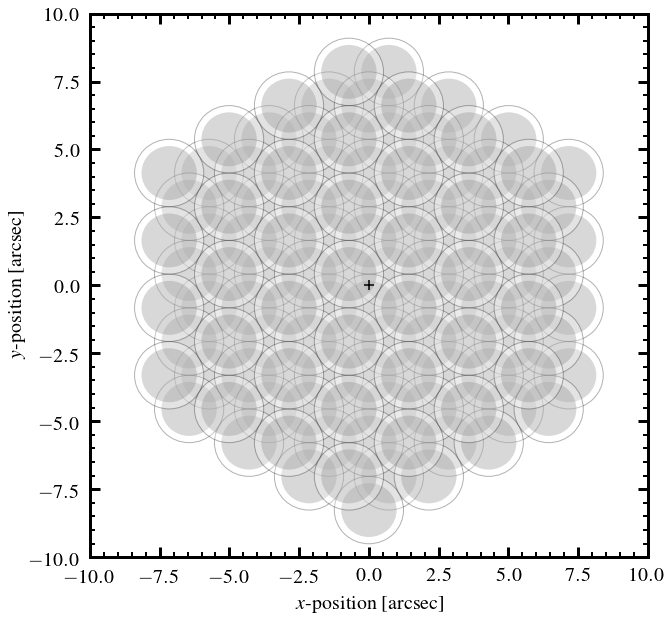

In [5]:
import os,sys
import numpy as np
from copy import copy

def Err_n_observations():
    print('You must select `n_observations` that is either:')
    print('(1) `Classic` for exact MaNGA specs and 3-exposure pattern; OR')
    print('(2) An integer `n_observations` greater than zero.')
    sys.exit(0)
    
def Check_for_list(x,n_observations):
    if type(x) is np.ndarray:
        if len(x) == n_observations:
            return x
    elif type(x) is list:
        if len(x) == n_observations:
            return np.array(x)
    else:
        err_msg = ['When `n_observations` is set greater than 1 and not `Classic`, you must set up the pattern.\n',
                   'The following parameters must be all be lists or 1D numpy arrays of length `n_observations`:\n',
                   '   (1) `bundle_xoffset_arcsec`\n',
                   '   (2) `bundle_yoffset_arcsec`\n',
                   '   (3) `rotation_degrees`\n',
                   'You are seeing this error because one or more of these parameters are not in the correct format.\n']
        sys.exit(''.join(err_msg))

def Rotate(v,rotation_degrees):
    '''Rotate vectors `v` by `rotation_degrees in R2=>R2'''
    theta_rad = rotation_degrees*np.pi/180
    cos_theta, sin_theta = np.cos(theta_rad), np.sin(theta_rad)
    A_theta = np.array([[cos_theta, -sin_theta],
                        [sin_theta,  cos_theta]])
    v = np.matmul(A_theta,v)
    return v

def MaNGA_Observe(n_observations='Classic',
                  fibers_per_side=4,
                  bundle_name='None',
                  fiber_diameter_mm=0.150,
                  core_diameter_mm=0.120,
                  arcsec_per_mm=1./0.06048,
                  rotation_degrees=0.,
                  bundle_xoffset_arcsec=0.,
                  bundle_yoffset_arcsec=0.,
                  return_params=True):
    '''
    Creates a MaNGA-like IFS observing pattern. For an overview of the MaNGA observing strategy, see here: 
    https://www.sdss.org/dr14/manga/manga-survey-strategy/
    
    Or here for more rigorous descriptions:
    Law et al. (2015) https://ui.adsabs.harvard.edu/abs/2015AJ....150...19L/abstract
    Bundy et al. (2015) https://ui.adsabs.harvard.edu/abs/2015ApJ...798....7B/abstract
    
    RealSim_IFS is a public tool and you are free to use/modify it however you wish. If you use RealSim_IFS.MaNGA_Observe or an adaptation in your research, please cite the papers above which provided the technical specifications I used to create the module. I would also appreciate citation to [Bottrell et al. in prep] until the corresponding release paper is published.
    
    Keyword descriptions:
    
    * `n_observations` (int or string) is the integer number of exposures you wish to take with a given fibre bundle type. `n_observations` can also be set to `Classic` to restore all parameters to the default MaNGA instrumental specs and three-exposure offset pattern used to "dither" the data. In short, dithering is used to fill in the gaps between the fibre footprints of individual exposures. Dithering is also important because, for the MaNGA instrument, it enables adequate sampling of the typical atmospheric point-spread function (1.6 arcsec). You can alternatively experiment with your own exposure pattern and dithering strategy by setting `n_observations` to any positive integer. In the case of `n_observations` greater than 1, the `bundle_x(y)offset_arcsec` and `rotation_degrees` parameters must be lists or numpy arrays. See their descriptions for details.
    
    * `fibers_per_side` (int) is the number of fibres along each side of a MaNGA hexagonal fibre bundle. Only one `fibers_per_side` can be set for a given observation pattern (i.e. MaNGA_Observe does not allow combination of fibre bundles of different size in the same observing pattern). `fibers_per_side` must be a positive interger greater than 0. In the most limited scenario, a single fiber at (0,0) can be made by setting `n_observations` to 1 and `fibers_per_side` to 1. Setting `n_observations` to `Classic` and `fibers_per_side` to an integer greater than zero will produce the observing pattern with that particular fibre size and with the exact MaNGA core, fiber, and exposure specs.
    
    * `bundle_name` (string) supersedes `fibers_per_side`. Setting `bundle_name` to a valid MaNGA fibre bunde name (e.g. `N61`) will generate bundles with that specific fibre pattern and IGNORE the `fibers_per_side` parameter. By default, `bundle_name` is `None` and must be set to `None` to use the `fibers_per_side` keyword.
    
    * `fiber_diameter_mm` and `fiber_core_diameter` (floats) are the desired physical sizes of each individual fibre (core+cladding) and core in the bundle in [mm].
    
    * `arcsec_per_mm` (float) is the physical-to-angular conversion ratio [arcsec/mm] at the prime-focus of instrument. For MaNGA, the reciprocal angular-to-physial scale is 60.48 microns/arcsec.
    
    * `rotation_degrees` (float) sets the counter-clockwise rotation (in degrees) of an individual exposure or full observing pattern. If `n_observations` is `Classic` or 1, `rotation_degrees` must be a single float. `n_observations` is an integer greater than 1, then `rotation_degrees` must be a list or numpy array whose elements give the rotation of each individual exposure. For the same rotation of each exposure, set the `rotation_degrees` keyword to something like np.zeros(n_observations)+rotation_degrees. 
    
    * `bundle_xoffset_arcsec` and `bundle_yoffset_arcsec` (floats) are the offsets (in arcsec) of each exposure's centre from (0,0) in x and y. If `n_observations` is `Classic` they are the default MaNGA offsets for the 3-exposure observing strategy. If `n_observations` is 1, then they must each be floats. If `n_observations` is greater than 1, both must be lists or numpy arrays in the same way as for `rotation_degrees`.
    
    * `return_params` (boolean): returns many of the variables which were used to set the observing strategy as well as some intuitively-named parameters that are computed internally when generating the output.
    
    Output:
    
    (xc_arr,yc_arr) or (xc_arr,yc_arr,params)
    
    * `xc_arr` and `yc_arr` are the coordinates of all fibers in the `n_observations` of exposures used in the observing strategy. They each have shape (`fibers_per_bundle`, `n_observations`) where `fibers_per_bundle` is the total number of fibers in an individual bundle and is an output passed to `params`. 
    
    * `params` is the dictionary of variables that is returned if `return_params` is True.
    '''  
       
    if n_observations == 'Classic':
        # restore all params to MaNGA defaults
        fiber_diameter_mm=0.150
        core_diameter_mm=0.120
        arcsec_per_mm=1./0.06048
        bundle_xoffset_arcsec=0.
        bundle_yoffset_arcsec=0.
        if type(rotation_degrees) is not float:
            sys.exit('When `n_observations` is `Classic`, the `rotation_degrees` must be a single float.')
        
    elif isinstance(n_observations,str):
        Error_n_observations()
        
    elif isinstance(n_observations,int) and not n_observations>0:
        Error_n_observations()
        
    elif isinstance(n_observations,int) and n_observations>1:
        rotation_degrees = Check_for_list(rotation_degrees,n_observations)
        bundle_xoffset_arcsec = Check_for_list(bundle_xoffset_arcsec,n_observations)
        bundle_yoffset_arcsec = Check_for_list(bundle_yoffset_arcsec,n_observations)
            

    # Useful quantities. See also:
    # https://www.sdss.org/dr14/manga/manga-survey-strategy/ and Law et al. (2015)
    fiber_diameter_arcsec = fiber_diameter_mm*arcsec_per_mm # arcsec
    core_diameter_arcsec = core_diameter_mm*arcsec_per_mm # arcsec
    cladding_arcsec = (core_diameter_mm-fiber_diameter_mm)*arcsec_per_mm # arcsec
    exposure_offset_arcsec = fiber_diameter_arcsec/np.sqrt(3) # arscec
    valid_bundle_names = ['N7','N19','N37','N61','N91','N127']

    if bundle_name is 'None':
        fibers_per_side = fibers_per_side

    elif bundle_name in valid_bundle_names:
        if bundle_name == 'N7':
            fibers_per_side = 2
        if bundle_name == 'N19':
            fibers_per_side = 3
        if bundle_name == 'N37':
            fibers_per_side = 4
        if bundle_name == 'N61':
            fibers_per_side = 5
        if bundle_name == 'N91':
            fibers_per_side = 6
        if bundle_name == 'N127':
            fibers_per_side = 7
    else:
        print("You have not selected a valid MaNGA fiber bundle name.")
        print("Choose from the following options:")
        print([str(name) for name in valid_bundle_names])
        print('OR set the `fibers_per_side` keyword to the integer number of fibers along each edge of the desired hexagonal bundle.')

    fiber_rows_per_bundle = 2*fibers_per_side-1
    xc_arr = np.array([])
    yc_arr = np.array([])
    fiber_xoffset = 0.

    for fiber_row_index in range(fiber_rows_per_bundle):
        if fiber_row_index == 0:
            fibers_in_row = copy(fibers_per_side)
        elif fiber_row_index>=fibers_per_side:
            fibers_in_row-=1
            fiber_xoffset-=fiber_diameter_arcsec/2.
        else:
            fibers_in_row+=1
            fiber_xoffset+=fiber_diameter_arcsec/2.
        xc_new = np.arange(0,fibers_in_row)*fiber_diameter_arcsec-fiber_xoffset
        yc_new = np.zeros_like(xc_new)-fiber_row_index*np.sqrt(3)/2*fiber_diameter_arcsec
        xc_arr = np.concatenate((xc_arr,xc_new))
        yc_arr = np.concatenate((yc_arr,yc_new))

    index_center = int(len(xc_arr)/2)
    xc = xc_arr[index_center]
    yc = yc_arr[index_center]
    xc_arr -= xc
    yc_arr -= yc
    
    if n_observations == 'Classic':
        n_observations = 3
        bundle_xoffset_arcsec = np.array([0,-np.sqrt(3)/2,0])*exposure_offset_arcsec
        bundle_yoffset_arcsec = np.array([0,0.5,1])*exposure_offset_arcsec
        xc_arr = xc_arr[...,np.newaxis]+bundle_xoffset_arcsec
        yc_arr = yc_arr[...,np.newaxis]+bundle_yoffset_arcsec
        xc_dither_correction = fiber_diameter_arcsec/2/3
        yc_dither_correction = fiber_diameter_arcsec/2/np.sqrt(3)
        xc_arr+=xc_dither_correction
        yc_arr-=yc_dither_correction
        if not rotation_degrees == 0.:
            v = np.stack((xc_arr,yc_arr),axis=0)
            v_prime = np.empty_like(v)
            for i_obs in range(n_observations):
                v_prime[...,i_obs] = Rotate(v[...,i_obs],rotation_degrees)
            xc_arr = v_prime[0,:]
            yc_arr = v_prime[1,:]
    else:
        xc_arr = xc_arr[...,np.newaxis]+np.zeros(n_observations)
        yc_arr = yc_arr[...,np.newaxis]+np.zeros(n_observations)
        v = np.stack((xc_arr,yc_arr),axis=0)
        v_prime = np.empty_like(v)
        if n_observations == 1:
            v_prime[...,0] = Rotate(v[...,0],rotation_degrees)
        else:    
            for i_obs in range(n_observations):
                v_prime[...,i_obs] = Rotate(v[...,i_obs],rotation_degrees[i_obs])
        xc_arr = v_prime[0,:]+bundle_xoffset_arcsec
        yc_arr = v_prime[1,:]+bundle_yoffset_arcsec
    
    if return_params:
        params = {'bundle_name':bundle_name,
                  'fibers_per_side':fibers_per_side,
                  'n_observations':n_observations,
                  'fiber_diameter_mm':fiber_diameter_mm,
                  'core_diameter_mm':core_diameter_mm,
                  'arcsec_per_mm':arcsec_per_mm,
                  'rotation_degrees':rotation_degrees,
                  'bundle_xoffset_arcsec':bundle_xoffset_arcsec,
                  'bundle_yoffset_arcsec':bundle_yoffset_arcsec,
                  'fiber_diameter_arcsec':fiber_diameter_arcsec,
                  'core_diameter_arcsec':core_diameter_arcsec,
                  'cladding_arcsec':cladding_arcsec,
                  'fibers_in_bundle':len(xc_arr)}
        return (xc_arr,yc_arr),params
    else: 
        return (xc_arr,yc_arr)
    
if __name__ == '__main__':
    
    import numpy as np
    import os,sys,time
    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle
    from matplotlib import rc
    rc('font',**{'family':'serif','serif':['Times']})
    rc('text', usetex=True)
    
    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.minorticks_on()
    ax.tick_params(axis='both',which='major',direction='in',length=10,width=3,labelsize=20,right=1,top=1)
    ax.tick_params(axis='both',which='minor',direction='in',length=5,width=2,right=1,top=1)
    ax.tick_params(axis='both',which='major',pad=10)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
    ax.set_xlabel(r'$x$-position [arcsec]',fontsize=20,labelpad=10)
    ax.set_ylabel(r'$y$-position [arcsec]',fontsize=20)
    ax.scatter(x=0.,y=0.,marker='+',s=100,zorder=10,color='black')
    
    (xc_arr,yc_arr),params = MaNGA_Observe(bundle_name='None',fibers_per_side=4,n_observations='Classic',
                                           bundle_xoffset_arcsec=0.,
                                           bundle_yoffset_arcsec=0.,
                                           rotation_degrees = 90.,
                                           return_params=True)
    fiber_diameter_arcsec = params['fiber_diameter_arcsec']
    core_diameter_arcsec = params['core_diameter_arcsec']
    n_observations = xc_arr.shape[-1]
    
    for i_obs in range(n_observations):
        xc_obs,yc_obs = xc_arr[:,i_obs],yc_arr[:,i_obs]
        for xy in zip(xc_obs,yc_obs):
            clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor='White',alpha=0.3)
            ax.add_artist(clad)
            core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,edgecolor='None',facecolor='Grey',alpha=0.3)
            ax.add_artist(core)

    #fig.savefig('MaNGA_Observe_Test_N37_rot90.pdf',bbox_inches='tight')

(7, 3)


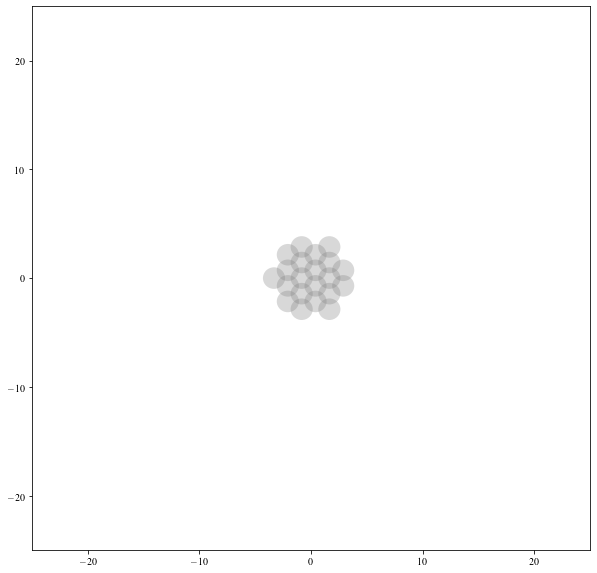

In [6]:
import numpy as np
import os,sys,time
import RealSim_IFS
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

(xc_arr,yc_arr),params = RealSim_IFS.MaNGA_Observe(bundle_name='None',fibers_per_side=2,n_observations='Classic',
                                           bundle_xoffset_arcsec=0.,
                                           bundle_yoffset_arcsec=0.,
                                           rotation_degrees = 0.,
                                           return_params=True)
fiber_diameter_arcsec = params['fiber_diameter_arcsec']
core_diameter_arcsec = params['core_diameter_arcsec']
n_observations = xc_arr.shape[-1]

fig,ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

print(xc_arr.shape)

for i_obs in range(n_observations):
    xc_obs,yc_obs = xc_arr[:,i_obs],yc_arr[:,i_obs]
    for xy in zip(xc_obs,yc_obs):
#         clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor='White',alpha=0.3)
#         ax.add_artist(clad)
        core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,edgecolor='None',facecolor='Grey',alpha=0.3)
        ax.add_artist(core)

Text(0.075, 0.925, 'SAMI')

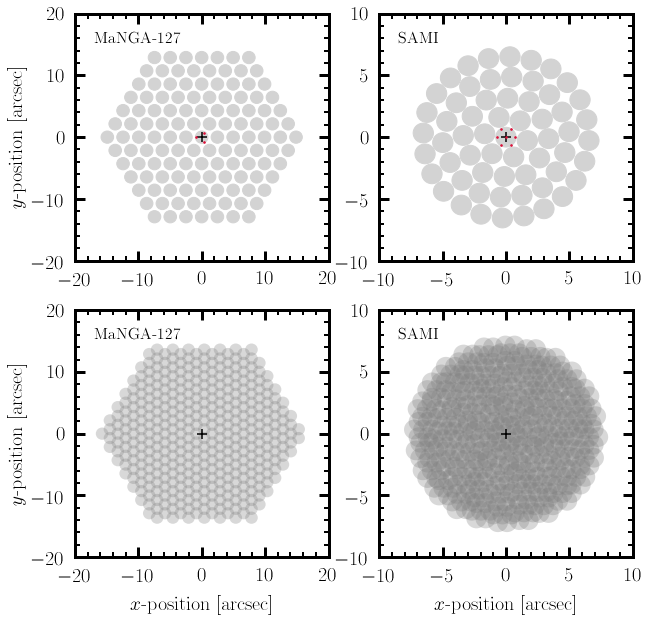

In [3]:
import numpy as np
import os,sys,time
import RealSim_IFS
from copy import copy
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib import rc

rc('font',**{'family':'serif'})
rc('text', usetex=True)

fig,axarr = plt.subplots(2,2,figsize=(10,10))
axarr = axarr.flatten()

for ax in axarr:
    ax.minorticks_on()
    ax.tick_params(axis='both',which='major',direction='in',length=10,width=3,labelsize=20,right=1,top=1)
    ax.tick_params(axis='both',which='minor',direction='in',length=5,width=2,right=1,top=1)
    ax.tick_params(axis='both',which='major',pad=10)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
    ax.scatter(x=0.,y=0.,marker='+',s=100,zorder=10,color='black')

for ax in [axarr[2],axarr[3]]:
    ax.set_xlabel(r'$x$-position [arcsec]',fontsize=20,labelpad=10)
for ax in [axarr[0],axarr[2]]:
    ax.set_ylabel(r'$y$-position [arcsec]',fontsize=20)
    
for ax in [axarr[0],axarr[2]]:
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
for ax in [axarr[1],axarr[3]]:
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)

    
# MANGA

ax = axarr[0]

(xc_arr,yc_arr),params = RealSim_IFS.MaNGA_Observe(bundle_name='N127',n_observations=1,
                                       bundle_xoffset_arcsec=0.,
                                       bundle_yoffset_arcsec=0.,
                                       rotation_degrees = 0.,
                                       return_params=True)
fiber_diameter_arcsec = params['fiber_diameter_arcsec']
core_diameter_arcsec = params['core_diameter_arcsec']
n_observations = xc_arr.shape[-1]

for i_obs in range(n_observations):
    xc_obs,yc_obs = xc_arr[:,i_obs],yc_arr[:,i_obs]
    for xy in zip(xc_obs,yc_obs):
#         clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor='White',alpha=1,linewidth=0.1)
#         ax.add_artist(clad)
        core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,edgecolor='lightgrey',facecolor='lightgrey',alpha=1)
        ax.add_artist(core)
        
xc_dither_correction = fiber_diameter_arcsec/2/3
yc_dither_correction = fiber_diameter_arcsec/2/np.sqrt(3)

dither_xc_offsets = np.array([ 0., -1.24, 0.])+xc_dither_correction
dither_yc_offsets = np.array([0., 0.71591433, 1.43182867])-yc_dither_correction
ax.scatter(dither_xc_offsets,dither_yc_offsets,zorder=11,s=10,marker='.',color='crimson')

ax.text(0.075,0.925,'MaNGA-127',transform=ax.transAxes,ha='left',va='top',fontsize=16)
        
ax = axarr[2]
(xc_arr,yc_arr),params = RealSim_IFS.MaNGA_Observe(bundle_name='N127',
                                                   n_observations='Classic',
                                       bundle_xoffset_arcsec=0.,
                                       bundle_yoffset_arcsec=0.,
                                       rotation_degrees = 0.,
                                       return_params=True)
fiber_diameter_arcsec = params['fiber_diameter_arcsec']
core_diameter_arcsec = params['core_diameter_arcsec']
n_observations = xc_arr.shape[-1]

for i_obs in range(n_observations):
    xc_obs,yc_obs = xc_arr[:,i_obs],yc_arr[:,i_obs]
    for xy in zip(xc_obs,yc_obs):
#         clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor='White',alpha=0.3)
#         ax.add_artist(clad)
        core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,facecolor='Grey',alpha=0.3)
        ax.add_artist(core)
        
ax.text(0.075,0.925,'MaNGA-127',transform=ax.transAxes,ha='left',va='top',fontsize=16)
     
# SAMI

ax = axarr[1]

xc_arr,yc_arr = np.loadtxt('Resources/SAMI_Fibre_xycoords_arcsec.dat',unpack=True)
core_diameter_arcsec = 1.6
fiber_diameter_arcsec = 1.6
dither_offset_radial = 0.45*core_diameter_arcsec
n_observations=1

dither_xc_offsets = np.array([0.,1.,np.cos(60*np.pi/180),
                              -np.cos(60*np.pi/180),-1,-np.cos(60*np.pi/180),
                              np.cos(60*np.pi/180)])*dither_offset_radial
dither_yc_offsets = np.array([0.,0.,np.sin(60*np.pi/180),
                              np.sin(60*np.pi/180),0,-np.sin(60*np.pi/180),
                              -np.sin(60*np.pi/180)])*dither_offset_radial

ax.scatter(dither_xc_offsets,dither_yc_offsets,zorder=11,s=10,marker='.',color='crimson')

for i_obs in range(n_observations):
    xc_obs,yc_obs = copy(xc_arr),copy(yc_arr)
    for xy in zip(xc_obs,yc_obs):
#         clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor='White',alpha=0.3,linewidth=0.1)
#         ax.add_artist(clad)
        core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,edgecolor='lightgrey',facecolor='lightgrey',alpha=1.)
        ax.add_artist(core)
        
ax.text(0.075,0.925,'SAMI',transform=ax.transAxes,ha='left',va='top',fontsize=16)
        
ax = axarr[3]

xc_arr,yc_arr = np.loadtxt('Resources/SAMI_Fibre_xycoords_arcsec.dat',unpack=True)
core_diameter_arcsec = 1.6
fiber_diameter_arcsec = 1.6
dither_offset_radial = 0.45*core_diameter_arcsec
n_observations=7

for i_obs in range(n_observations):
    xc_obs,yc_obs = copy(xc_arr)+dither_xc_offsets[i_obs],copy(yc_arr)+dither_yc_offsets[i_obs]
    for xy in zip(xc_obs,yc_obs):
#         clad = Circle(xy=xy,radius=fiber_diameter_arcsec/2,transform=ax.transData,edgecolor='black',facecolor='White',alpha=0.3)
#         ax.add_artist(clad)
        core = Circle(xy=xy,radius=core_diameter_arcsec/2,transform=ax.transData,facecolor='Grey',alpha=0.3)
        ax.add_artist(core)

ax.text(0.075,0.925,'SAMI',transform=ax.transAxes,ha='left',va='top',fontsize=16)

#fig.savefig('Figures/MaNGA_SAMI_Fibre_Example.pdf',bbox_inches='tight')

In [104]:
1.6/21
print(1.6*0.45)

# print(120/2.*0.25)

0.7200000000000001
